In [1]:
from functions import *

In [59]:
n = 5
m = RandomIsingModel(n=n, seed=0)

In [60]:
from scipy.integrate import solve_ivp

H_ising = np.diag(m.E_rescaled)
H_mixer = H_mixer_list[m.n-1]
d = int(2**m.n)


def hamiltonian(s): return (1-s)*H_ising + s*H_mixer

In [61]:
# schedule = [0,0.25,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.25,0]
# n_steps = len(schedule)
# energies = np.zeros((n_steps, d))
# for i, s in enumerate(schedule):
#     w, v = np.linalg.eigh(hamiltonian(s))
#     energies[i,:] = w

In [62]:
# plt.figure(figsize=(figure_size_x*2, figure_size_y))
# plt.subplot(121)
# for state in range(d):
#     plt.plot(np.linspace(0,1,n_steps), energies[:,state], color = red, alpha = 0.3 + 0.7/(state + 1))
# plt.xlabel('s(t)')
# plt.ylabel('Energy')
# plt.title('$H(s) = s H_{prob} + (1-s) H_{mix}$')

# plt.subplot(122)
# plt.plot(schedule, '.--', color = dark_grey)
# plt.xlabel('t')
# plt.ylabel('s(t)')
# plt.show()

In [63]:
n_steps = 10
schedule = np.linspace(0,1,n_steps)
energies = np.zeros((n_steps, d))
for i, s in enumerate(schedule):
    w, v = np.linalg.eigh(hamiltonian(s))
    energies[i,:] = w

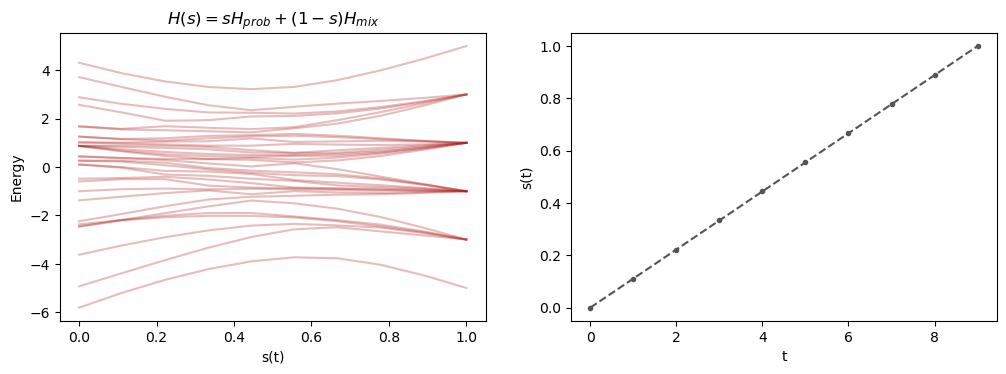

In [64]:
plt.figure(figsize=(figure_size_x*2, figure_size_y))
plt.subplot(121)
for state in range(d):
    plt.plot(schedule, energies[:,state], color = red, alpha = 0.3)
plt.xlabel('s(t)')
plt.ylabel('Energy')
plt.title('$H(s) = s H_{prob} + (1-s) H_{mix}$')

plt.subplot(122)
plt.plot(schedule, '.--', color = dark_grey)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.show()

In [66]:
gaps = np.zeros((n_steps, d-1))
for i in range(n_steps):
    for j in range(d-1):
        gaps[i,j] = energies[i,j+1] - energies[i,j]

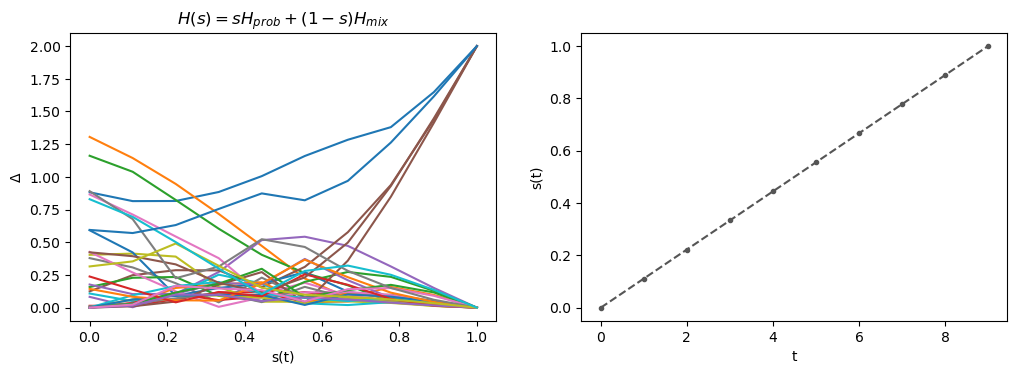

In [67]:
plt.figure(figsize=(figure_size_x*2, figure_size_y))
plt.subplot(121)
for state in range(d-1):
    # plt.plot(schedule, gaps[:,state], color = red, alpha = 0.3 + 0.7/(state + 1))
    plt.plot(schedule, gaps[:,state], label = f'Δ{state, state+1}')
plt.xlabel('s(t)')
plt.ylabel('Δ')
plt.title('$H(s) = s H_{prob} + (1-s) H_{mix}$')
# plt.legend()

plt.subplot(122)
plt.plot(schedule, '.--', color = dark_grey)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.show()

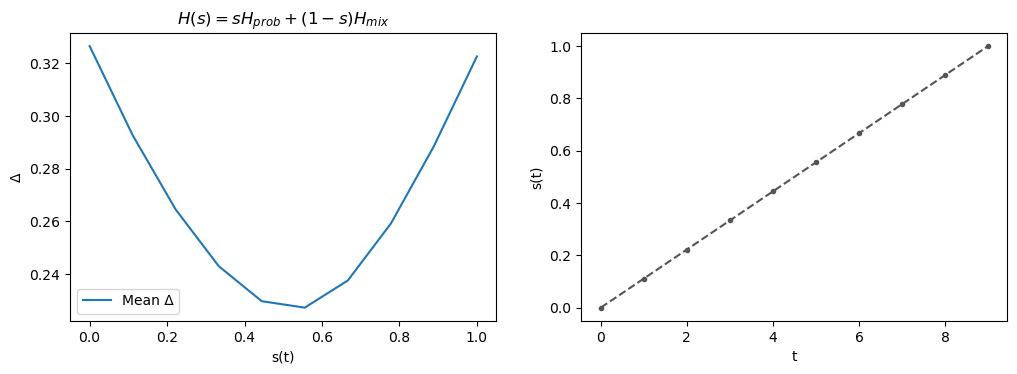

In [68]:
plt.figure(figsize=(figure_size_x*2, figure_size_y))
plt.subplot(121)
    
plt.plot(schedule, np.mean(gaps, axis=1), label = 'Mean Δ')
plt.xlabel('s(t)')
plt.ylabel('Δ')
plt.title('$H(s) = s H_{prob} + (1-s) H_{mix}$')
plt.legend()

plt.subplot(122)
plt.plot(schedule, '.--', color = dark_grey)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.show()